🎯 Project Goal

The objective of this project is to analyze the ride-booking dataset in order to extract meaningful insights about customer behavior, driver performance, and overall ride patterns. The key goals include:

1.🚖 Booking Patterns

Analyze the distribution of rides across different booking statuses (Completed, Cancelled, Incomplete, No Driver Found).

Identify major reasons for ride failures.

2.🚗 Vehicle Demand Analysis

Understand which vehicle types (Bike, Auto, Sedan, etc.) are most frequently used.

Study demand patterns for different vehicles over time.

3.💰 Revenue Insights

Calculate total and average revenue across rides.

Compare revenue contribution by vehicle type and payment method.

4.⭐ Customer & Driver Experience

Study the distribution of customer and driver ratings.

Identify factors affecting higher or lower ratings.

5.📍 Location-Based Trends

Find the most popular pickup and drop locations.

Study city hotspots for demand and cancellations.

6.📆 Time-Based Trends

Analyze rides by date, day of week, and hour of the day.

Identify peak demand periods (rush hours, weekends, etc.).

---------------Import Data

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "ncr_ride_bookings.csv.xlsx"   # Make sure this file is in your working directory
df = pd.read_excel(file_path)

# Step 3: Preview dataset
print("Dataset Preview:")
print(df.head())

print("\nDataset Info:")
print(df.info())


Dataset Preview:
        Date      Time    Booking ID   Booking Status   Customer ID  \
0 2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1 2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2 2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3 2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4 2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  .

---------Data Cleaning

In [ ]:
# 1. Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# 2. Remove extra quotes in IDs
df['booking_id'] = df['booking_id'].str.replace('"', '', regex=False)
df['customer_id'] = df['customer_id'].str.replace('"', '', regex=False)

# 3. Convert date and time into proper formats
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.time

# 4. Missing values summary
missing_summary = df.isna().sum().sort_values(ascending=False)
print("\nMissing Values Summary (Top 10):")
print(missing_summary.head(10))



Missing Values Summary (Top 10):
incomplete_rides_reason              141000
incomplete_rides                     141000
reason_for_cancelling_by_customer    139500
cancelled_rides_by_customer          139500
cancelled_rides_by_driver            123000
driver_cancellation_reason           123000
driver_ratings                        57000
customer_rating                       57000
avg_ctat                              48000
ride_distance                         48000
dtype: int64


-------------Booking Status Distribution

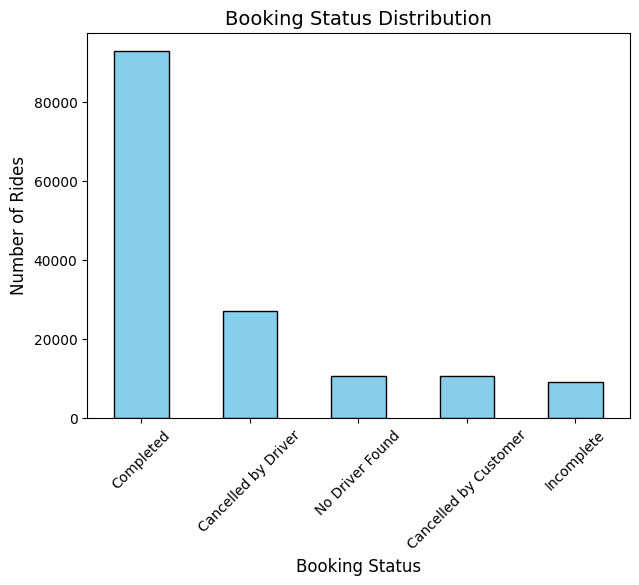


Booking Status Counts:
booking_status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64


In [ ]:
# Count how many rides fall under each booking status
status_counts = df['booking_status'].value_counts()

# Plot booking status distribution
plt.figure(figsize=(7,5))
status_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Booking Status Distribution", fontsize=14)
plt.xlabel("Booking Status", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("\nBooking Status Counts:")
print(status_counts)


-------------Vehicle Type Analysis

/tmp/ipython-input-2428917228.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette="viridis", edgecolor="black")


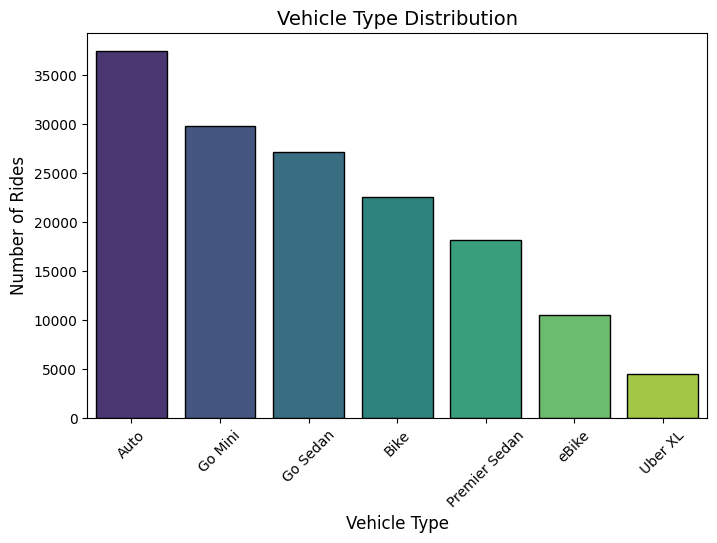


Vehicle Type Counts:
vehicle_type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64


In [ ]:
# Count number of rides for each vehicle type
vehicle_counts = df['vehicle_type'].value_counts()

# Plot vehicle type distribution
plt.figure(figsize=(8,5))
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette="viridis", edgecolor="black")

# Add labels and title
plt.title("Vehicle Type Distribution", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("\nVehicle Type Counts:")
print(vehicle_counts)


------------Revenue by Vehicle Type

/tmp/ipython-input-2859221396.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_vehicle.index, y=revenue_by_vehicle.values, palette="magma", edgecolor="black")


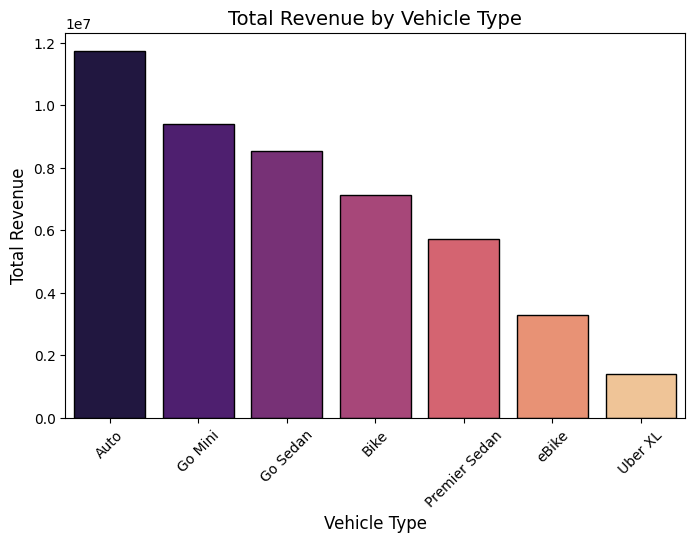


Revenue by Vehicle Type:
vehicle_type
Auto             11727615.0
Go Mini           9411418.0
Go Sedan          8538560.0
Bike              7144913.0
Premier Sedan     5733655.0
eBike             3298157.0
Uber XL           1406256.0
Name: booking_value, dtype: float64


In [ ]:
# Consider only completed rides for revenue analysis
completed_rides = df[df['booking_status'] == "Completed"]

# Group by vehicle type and sum booking value
revenue_by_vehicle = completed_rides.groupby('vehicle_type')['booking_value'].sum().sort_values(ascending=False)

# Plot revenue by vehicle type
plt.figure(figsize=(8,5))
sns.barplot(x=revenue_by_vehicle.index, y=revenue_by_vehicle.values, palette="magma", edgecolor="black")

# Add labels and title
plt.title("Total Revenue by Vehicle Type", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("\nRevenue by Vehicle Type:")
print(revenue_by_vehicle)


---------Revenue by Payment Method

/tmp/ipython-input-4142981715.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_payment.index, y=revenue_by_payment.values, palette="coolwarm", edgecolor="black")


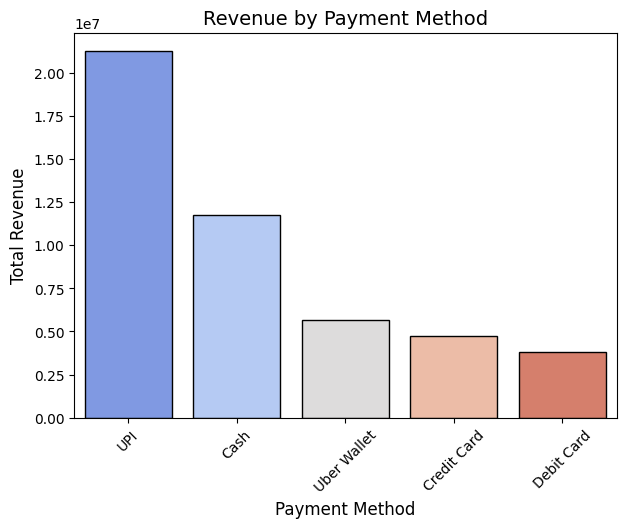


Revenue by Payment Method:
payment_method
UPI            21274591.0
Cash           11756071.0
Uber Wallet     5669070.0
Credit Card     4753767.0
Debit Card      3807075.0
Name: booking_value, dtype: float64


In [ ]:
# Revenue grouped by payment method (only completed rides)
revenue_by_payment = completed_rides.groupby('payment_method')['booking_value'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(7,5))
sns.barplot(x=revenue_by_payment.index, y=revenue_by_payment.values, palette="coolwarm", edgecolor="black")
plt.title("Revenue by Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("\nRevenue by Payment Method:")
print(revenue_by_payment)


---------Customer & Driver Ratings Distribution

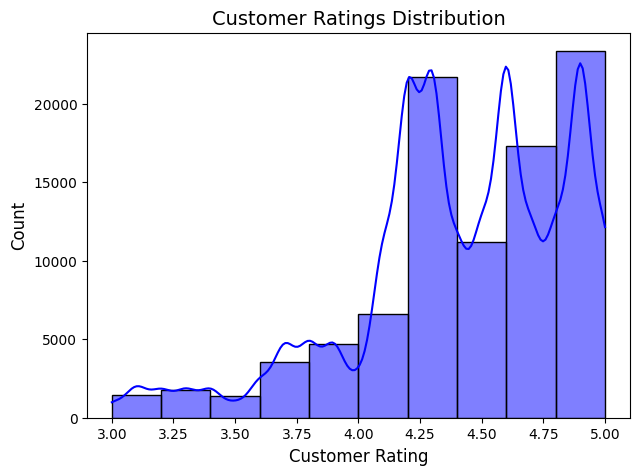

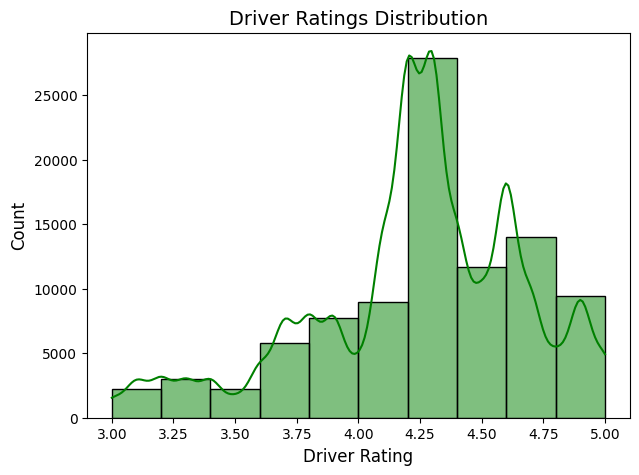

In [ ]:
# Plot customer ratings distribution
plt.figure(figsize=(7,5))
sns.histplot(df['customer_rating'].dropna(), bins=10, kde=True, color="blue")
plt.title("Customer Ratings Distribution", fontsize=14)
plt.xlabel("Customer Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Plot driver ratings distribution
plt.figure(figsize=(7,5))
sns.histplot(df['driver_ratings'].dropna(), bins=10, kde=True, color="green")
plt.title("Driver Ratings Distribution", fontsize=14)
plt.xlabel("Driver Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


-----------Popular Pickup & Drop Locations

/tmp/ipython-input-3266027624.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.values, y=top_pickups.index, palette="viridis")


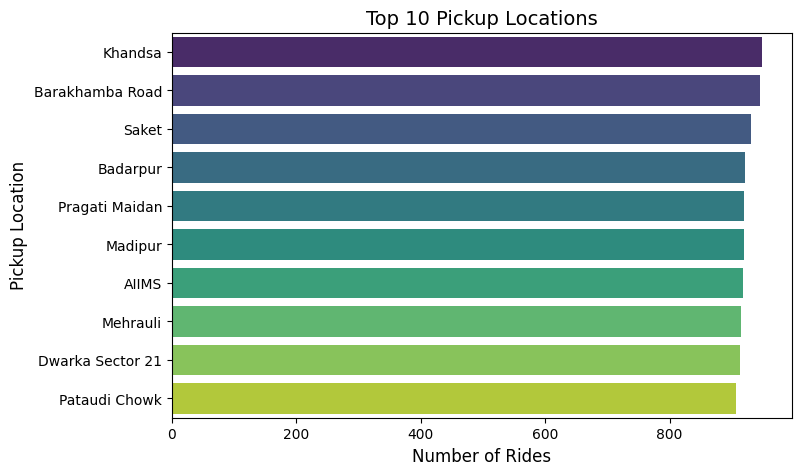

/tmp/ipython-input-3266027624.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drops.values, y=top_drops.index, palette="plasma")


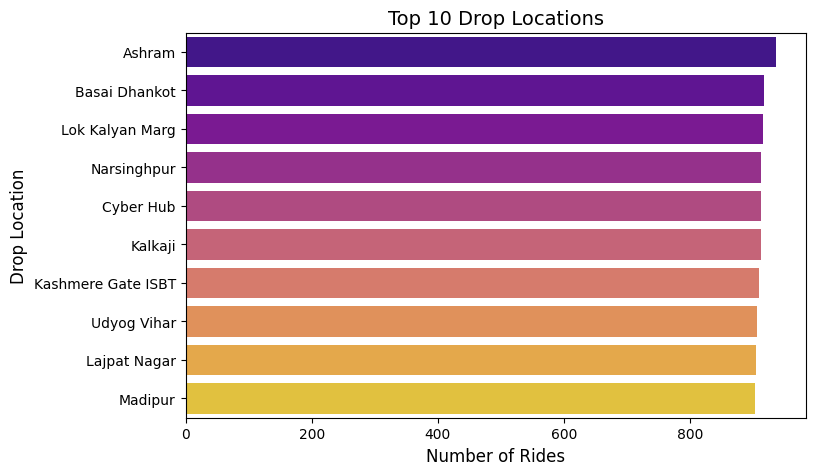

In [ ]:
# Top 10 pickup locations
top_pickups = df['pickup_location'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_pickups.values, y=top_pickups.index, palette="viridis")
plt.title("Top 10 Pickup Locations", fontsize=14)
plt.xlabel("Number of Rides", fontsize=12)
plt.ylabel("Pickup Location", fontsize=12)
plt.show()

# Top 10 drop locations
top_drops = df['drop_location'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_drops.values, y=top_drops.index, palette="plasma")
plt.title("Top 10 Drop Locations", fontsize=14)
plt.xlabel("Number of Rides", fontsize=12)
plt.ylabel("Drop Location", fontsize=12)
plt.show()


-----------Time-Based Trends

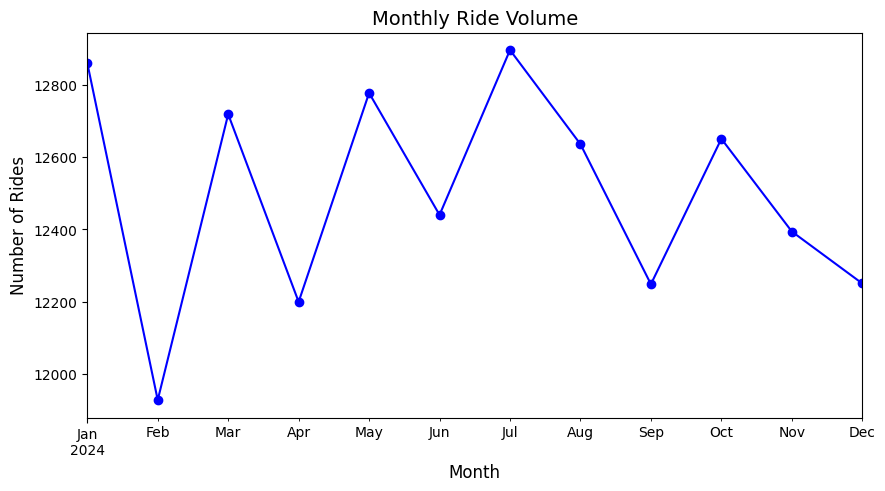

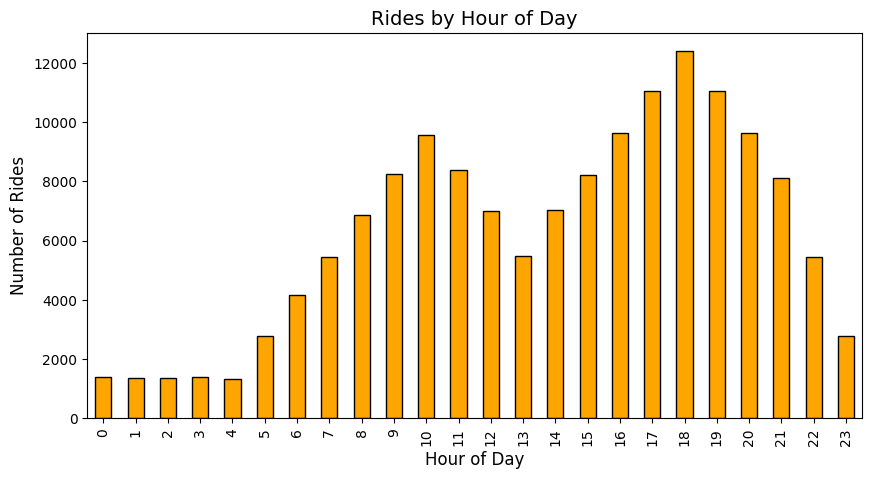

In [ ]:
# Create a datetime column
df['datetime'] = pd.to_datetime(df['date'].astype(str) + " " + df['time'].astype(str), errors='coerce')

# Monthly trend of rides
monthly_trend = df.groupby(df['date'].dt.to_period("M"))['booking_id'].count()

plt.figure(figsize=(10,5))
monthly_trend.plot(kind='line', marker='o', color="blue")
plt.title("Monthly Ride Volume", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.show()

# Hourly demand (peak hours)
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.hour
hourly_trend = df.groupby('hour')['booking_id'].count()

plt.figure(figsize=(10,5))
hourly_trend.plot(kind='bar', color="orange", edgecolor="black")
plt.title("Rides by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.show()


---------Cancellation Analysis

/tmp/ipython-input-3162473535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette="Set2", edgecolor="black")


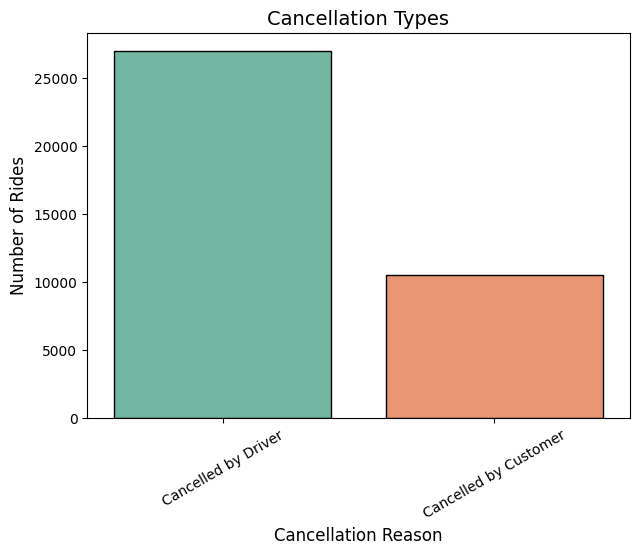


Cancellation Counts:
booking_status
Cancelled by Driver      27000
Cancelled by Customer    10500
Name: count, dtype: int64


In [ ]:
# Count booking status related to cancellations
cancellation_counts = df[df['booking_status'].str.contains("Cancelled", na=False)]['booking_status'].value_counts()

plt.figure(figsize=(7,5))
sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette="Set2", edgecolor="black")
plt.title("Cancellation Types", fontsize=14)
plt.xlabel("Cancellation Reason", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.xticks(rotation=30)
plt.show()

print("\nCancellation Counts:")
print(cancellation_counts)
